
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Thursday, November 29th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please format **your filename to include your EID** (ex. ss324.ipynb or ss324_mj345.ipypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Submitted by Apoorva Reddy Adavalli & Jui Gupta 

# Question 1 - Bayesian Belief Network (15 pts)

An example of Bayesian network for a futuristic medical diagnosis is shown below. This network might be used to diagnose whether a patient is suffering from a mere common cold (C) and/or the more dangerous Martian Death Flu (F), based on the patients' symptoms -- whether or not the patient has a runny nose (R), whether or not the patient has a headache (H), and whether or not the patient occasionally spontaneously bursts into flames (S) -- as well as relevant background information, namely whether or not he or she has previously visited Mars (V).    
All the six variables are binary with 1 representing "true" and 0 "false".

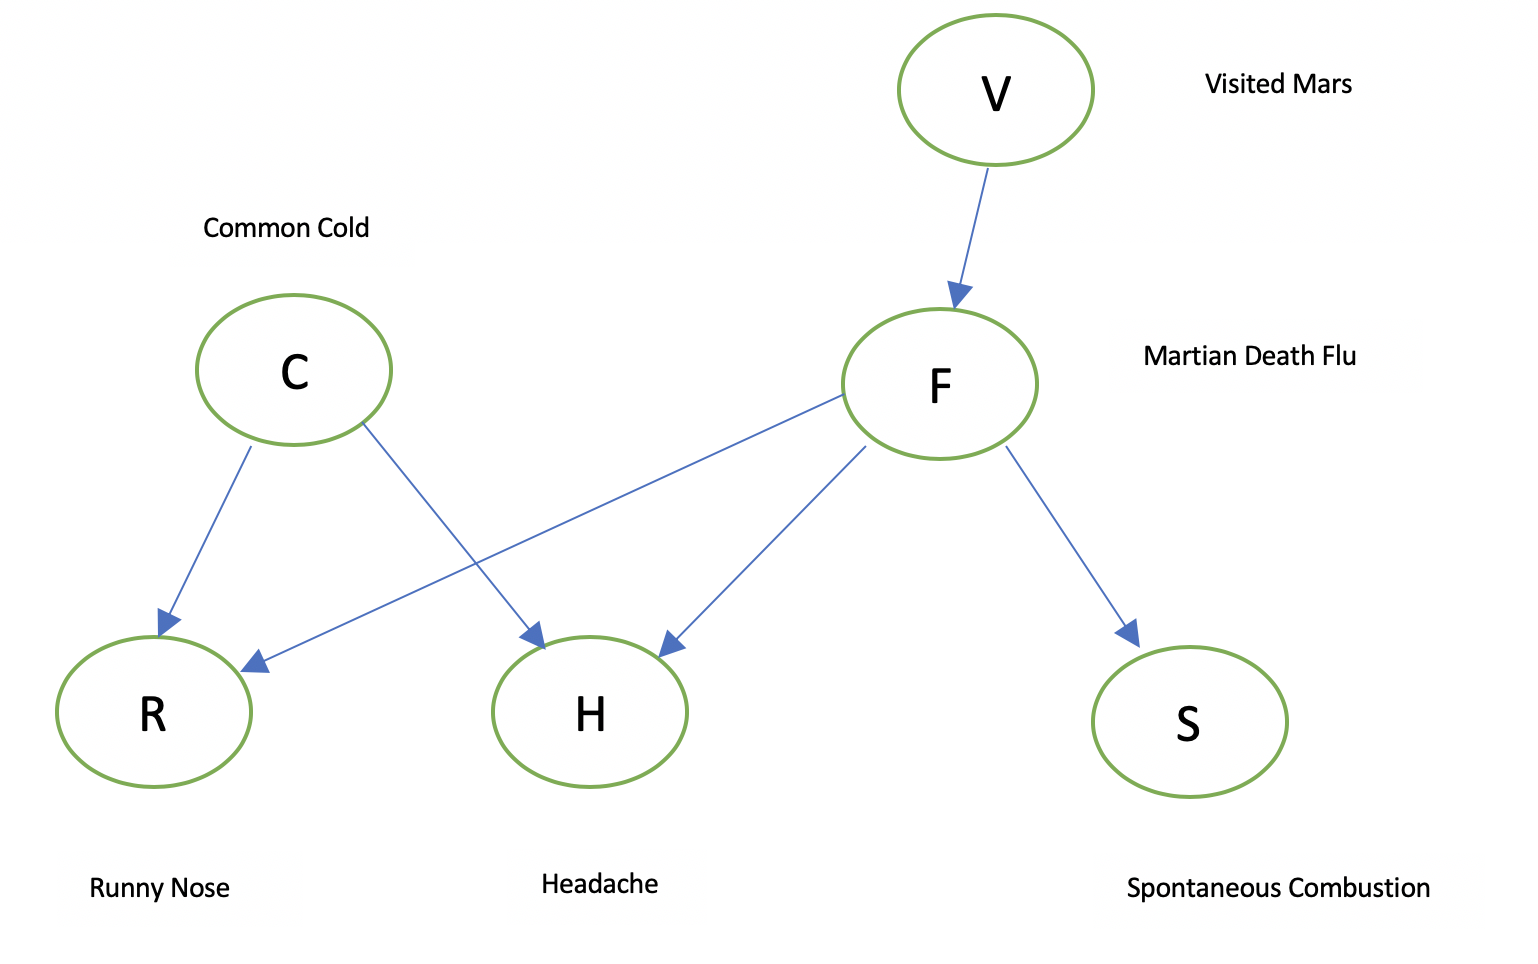

In [1]:
from IPython.display import Image
Image(filename='BBN.png',retina=True)

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(V = 1) = 0.0001   
P(C = 1) = 0.05  


P(F = 1 | V = 0) = 0.0  
P(F = 1 | V = 1) = 0.999  

P(R = 1 | C = 0, F = 0) = 0.05  
P(R = 1 | C = 0, F = 1) = 0.50  
P(R = 1 | C = 1, F = 0) = 0.90  
P(R = 1 | C = 1, F = 1) = 0.98

P(H = 1 | C = 0, F = 0) = 0.07  
P(H = 1 | C = 0, F = 1) = 0.98  
P(H = 1 | C = 1, F = 0) = 0.60  
P(H = 1 | C = 1, F = 1) = 0.99

P(S = 1 | F = 0) = 0.0  
P(S = 1 | F = 1) = 0.8 

For the given Bayesian network, Compute the following probabilities : 


(a) (5 pts) Find the probability that a person has a headache.

(b) (5 pts) Given that a person visited Mars, what is the probability that he has a runny nose?

(c) (5 pts) Given that a person visited Mars and has a runny nose, what is the probability that the person has a common cold and not the Martian Death Flu?

## Answer

In [2]:
def prob_v(V):
    if(V==1):
        return(0.0001)
    else:
        return(1 - 0.0001)
    
def prob_c(C):
    if(C==1):
        return(0.05)
    else:
        return(1 - 0.05)   
    

def prob_f(F,V):
    if(V==0):
        if(F==1):
            return(0.00)
        else:
            return(1.00)
    else:
        if(F==1):
            return(0.99)
        else:
            return(1-0.99)

def prob_r(R,C,F):
    if(C==0 and F == 0):
        if(R==1):
            return(0.05)
        else:
            return(1-0.05)
    elif(C == 0 and F == 1):
        if(R==1):
            return(0.50)
        else:
            return(1-0.50)
    elif(C == 1 and F == 0):
        if(R==1):
            return(0.9)
        else:
            return(1-0.9)
    else:
        if(R==1):
            return(0.98)
        else:
            return(1-0.98)
        
    
def prob_h(H,C,F):
    if(C==0 and F == 0):
        if(H==1):
            return(0.07)
        else:
            return(1-0.07)
    elif(C == 0 and F == 1):
        if(H==1):
            return(0.98)
        else:
            return(1-0.98)
    elif(C == 1 and F == 0):
        if(H==1):
            return(0.6)
        else:
            return(1-0.6)
    else:
        if(H==1):
            return(0.99)
        else:
            return(1-0.99)

def prob_s(S,F):
    if(F==0):
        if(S==1):
            return(0.00)
        else:
            return(1.00)
    else:
        if(S==1):
            return(0.8)
        else:
            return(1-0.8)
        
def bayes(V,C,F,R,H,S):
    return(prob_v(V)*prob_c(C)*prob_f(F,V)*prob_r(R,C,F)*prob_h(H,C,F)*prob_s(S,F))

a)

In [3]:
from itertools import product

#p(H=1)
ans_A = 0
for i in product([0,1],repeat =5):
    
    V=i[0]
    C=i[1]
    F=i[2]
    R=i[3]
    H=1
    S=i[4]
    ans_A+=bayes(V,C,F,R,H,S)
    
print('Probability that a person has a headache : ')
print(round(ans_A,4))

Probability that a person has a headache : 
0.0966


b)

In [4]:
numerator = 0
denominator = 0
ans_B = 0
for i in product([0,1],repeat =4):
    V=1
    C=i[1]
    F=i[2]
    R=1
    H=i[3]
    S=i[0]
    numerator+=bayes(V,C,F,R,H,S)
    
for i in product([0,1],repeat =5):
    V=1
    C=i[1]
    F=i[2]
    R=i[3]
    H=i[4]
    S=i[0]
    denominator+=bayes(V,C,F,R,H,S)
ans_B = numerator/denominator
print('Given that a person visited Mars, the probability that he has a runny nose : ')
print(round(ans_B,4))

Given that a person visited Mars, the probability that he has a runny nose : 
0.5197


c)

In [5]:
from itertools import product
numerator1 = 0
denominator1 = 0
ans_C = 0

for i in product([0,1],repeat =2):
    V=1
    C=1
    F=0
    R=1
    H=i[0]
    S=i[1]
    numerator1+=bayes(V,C,F,R,H,S)

for i in product([0,1],repeat =4):
    V=1
    C=[0]
    F=[1]
    R=1
    H=i[2]
    S=i[3]
    denominator1+=bayes(V,C,F,R,H,S)


answer_C = numerator1/denominator1
print('Given that a person visited mars, and has a runny nose, the probability that he has a common cold and not martian death flu : ')
print(round(ans_C,4))

Given that a person visited mars, and has a runny nose, the probability that he has a common cold and not martian death flu : 
0


# Question 2 - Support Vector Machine ( 15 points)

## Gender Recognition by voice

In this question, we will try to identify a voice as male or female. The dataset is taken from kaggle [Gender Recognition by Voice](https://www.kaggle.com/primaryobjects/voicegender/home). Go ahead and read it to understand the different variables.

(a) (6pts) Apply a linear SVM, using scikit-SVM. Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

(b) (6pts) Repeat (a) but with a Gaussian radial basis kernel.

(c) (3pts) Summarize the comparative performance (mean error rates) of the classifiers. What can you conclude? (Be brief.)

In [6]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
#import the_module_that_warns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('voice.csv')

In [8]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [9]:
X=data.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [10]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [13]:
print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (2122, 20) (2122,)
test (1046, 20) (1046,)


## (a) 

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV

clf_svc = SVC(kernel = 'linear')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_svc1 = GridSearchCV(clf_svc, param_grid, n_jobs=None, cv=10)             
grid_search_svc1.fit(X_train, y_train)
best_C1 = grid_search_svc1.best_params_['C']
print('Best value of slack cost/penalty for linear SVM:')             
print(best_C1)
clf_svc1 = SVC(kernel = 'linear', C = best_C1)
clf_svc1.fit(X_train, y_train)
y_pred1 = clf_svc1.predict(X_test)

print('Best score for test data linear SVM:')
print(grid_search_svc1.best_score_)

Best value of slack cost/penalty for linear SVM:
10
Best score for test data linear SVM:
0.9731385485391141


## (b)

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
clf_svc = SVC(kernel = 'rbf')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_svc2 = GridSearchCV(clf_svc, param_grid, n_jobs=None, cv=10)             
grid_search_svc2.fit(X_train, y_train)
best_C2 = grid_search_svc2.best_params_['C']
print('Best value of slack cost/penalty for Gaussian radial basis kernel:')             
print(best_C2)              
clf_svc2 = SVC(kernel = 'rbf', C = best_C2)
clf_svc2.fit(X_train, y_train)
y_pred2 = clf_svc2.predict(X_test)

print('Best score for Gaussian radial basis kernel:')
print(grid_search_svc2.best_score_)

Best value of slack cost/penalty for Gaussian radial basis kernel:
1
Best score for Gaussian radial basis kernel:
0.9811498586239397


## (c)

In [16]:
accuracy_svc1 = accuracy_score(y_test, y_pred1)
print('Mean error rate of SVC with linear kernel:')
print(1-accuracy_svc1)

accuracy_svc2 = accuracy_score(y_test, y_pred2)
print('mean error rate of SVC with RBF kernel:')
print(1-accuracy_svc2)

Mean error rate of SVC with linear kernel:
0.02294455066921608
mean error rate of SVC with RBF kernel:
0.019120458891013437


Linear SVM has higher mean error rate compared to SVM with Gaussian radial basis kernel. The linear kernel is a degenerate version of RBF hence a properly tuned RBF kernel is alwaus more accurate than linear kernel. If the number of features is super large, one may not need to map data to a higher dimensional space. That is, the nonlinear mapping does not improve the performance. Using the linear kernel is good enough, and one only searches for the parameter C. But we do not have a super large number of features and in our case, RBF kernel performs better than Linear kernel.

## Answer

# Question 3 - Ensembles ( 20 points)

In this question, we will compare the performance of different ensemble methods for classification problems: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier). 

We will use the dataset from the kaggle competition [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit). We will work on a smaller version of this dataset. The dataset is available on canvas as ensemble-dataset.csv. 
We will predict the probability that somebody will experience financial distress in the next two years. The dataset has already been split into train and test sets for you.


1. (5pts) Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict whether somebody will experience financial distress in the next two years. Find the best parameters (including *n_estimators* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data. You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score. Plot the feature importance as well.

2. (10pts) Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate,* and *max_depth (GBDT only)*), and report the confusion matrix and roc_auc_score on test data for each classifier. Also plot the feature importance for each classifier.

3. (5pts) Point out one advantage and one disadvantage of Random Forest compared to GBDT.

In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('ensemble-dataset.csv')

In [19]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents
0,0,1.062646,50,2,0.179032,3490,8,1,0,1,1
1,0,0.003591,83,0,0.000869,10352,14,0,0,0,0
2,0,1.000000,22,0,0.000000,100,1,0,0,0,0
3,0,0.000000,52,0,0.336355,7060,10,0,2,0,3
4,0,0.220152,54,0,0.235064,4083,15,0,0,0,1


In [20]:
data.shape

(5049, 11)

In [21]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3382, 10) (3382,)
test (1667, 10) (1667,)


## Answer

## 1. Random Forest

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
#from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [24]:
print ("Best parameters - Random Forest")
print (CV_rfc.best_params_)

Best parameters - Random Forest
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


In [25]:
from sklearn.metrics import accuracy_score
best_param_RF = CV_rfc.best_estimator_
pred=best_param_RF.predict(X_test)
print("Accuracy for Random Forest on test data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on test data:  0.9370125974805039


[[1552    7]
 [  98   10]]


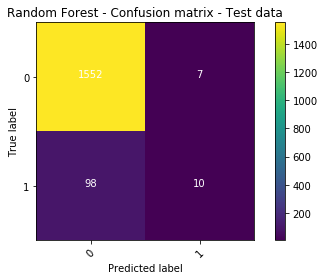

In [26]:
#Confusion matrix 
import itertools
conf_mat = confusion_matrix(y_test, pred)
print(conf_mat)
classes=y_test.unique()
plt.imshow(conf_mat)#, interpolation='nearest')
plt.title('Random Forest - Confusion matrix - Test data')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        #thresh = conf_mat.max() / 2.
        plt.text(j, i, format(conf_mat[i, j]),
                 horizontalalignment="center",
                 color="white")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

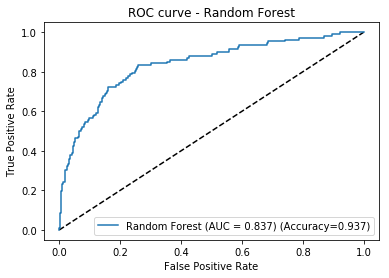

In [27]:
#sklearn.metrics.roc_auc_score(y_test, y_score, average=’macro’, sample_weight=None, max_fpr=None)
from sklearn.metrics import roc_curve,roc_auc_score,auc
y_pred_rf_prob=best_param_RF.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
rf_roc_auc=auc(fpr_rf, tpr_rf)
rf_score=best_param_RF.score(X_test,y_test)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.3f) (Accuracy=%0.3f)' %(rf_roc_auc,rf_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Random Forest-Variable Importance')

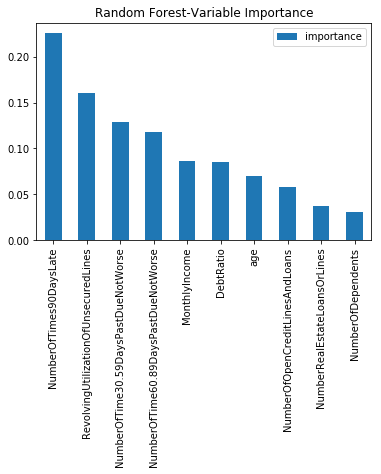

In [28]:
feature_importances = pd.DataFrame(best_param_RF.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.title('Random Forest-Variable Importance')

## 2. Gradient Boosting & AdaBoost

In [29]:
#Gradient Boosting 

In [30]:
gbc=GradientBoostingClassifier(random_state=42)
parameters = {
    #"loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[5,10,15]
    }
CV_gbc = GridSearchCV(gbc,parameters, cv=5, n_jobs=-1, scoring = 'roc_auc')
CV_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], 'max_depth': [3, 5, 8], 'max_features': ['log2', 'sqrt'], 'n_estimators': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [31]:
print ("Best parameters - Gradient Boosting")
print (CV_gbc.best_params_)

Best parameters - Gradient Boosting
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 15}


In [32]:
from sklearn.metrics import accuracy_score
best_param_gbc = CV_gbc.best_estimator_
pred_gbc=best_param_gbc.predict(X_test)
print("Accuracy for Gradient Boosting on test data: ",accuracy_score(y_test,pred_gbc))

Accuracy for Gradient Boosting on test data:  0.9352129574085183


[[1559    0]
 [ 108    0]]


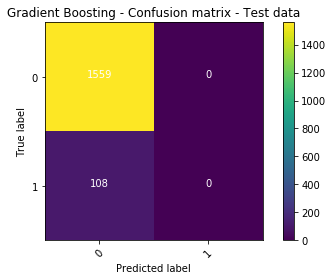

In [33]:
#Confusion matrix 
import itertools
conf_mat_gbc = confusion_matrix(y_test, pred_gbc)
print(conf_mat_gbc)
classes=y_test.unique()
plt.imshow(conf_mat_gbc)#, interpolation='nearest')
plt.title('Gradient Boosting - Confusion matrix - Test data')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(conf_mat_gbc.shape[0]), range(conf_mat_gbc.shape[1])):
        #thresh = conf_mat.max() / 2.
        plt.text(j, i, format(conf_mat_gbc[i, j]),
                 horizontalalignment="center",
                 color="white")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

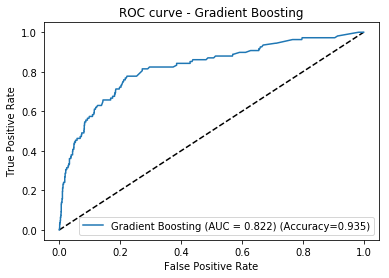

In [34]:
#sklearn.metrics.roc_auc_score(y_test, y_score, average=’macro’, sample_weight=None, max_fpr=None)
from sklearn.metrics import roc_curve,roc_auc_score,auc
y_pred_gbc_prob=best_param_gbc.predict_proba(X_test)[:, 1]
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_gbc_prob)
gbc_roc_auc=auc(fpr_gbc, tpr_gbc)
gbc_score=best_param_gbc.score(X_test,y_test)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting (AUC = %0.3f) (Accuracy=%0.3f)' %(gbc_roc_auc,gbc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Gradient Boosting-Variable Importance')

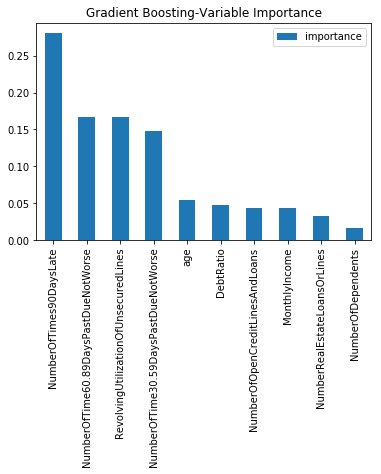

In [35]:
feature_importances = pd.DataFrame(best_param_gbc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.title('Gradient Boosting-Variable Importance')

In [36]:
#AdaBoost

In [37]:
param_grid = {"n_estimators":[100,500]
              #"learning_rate":list(np.linspace(0.01,1,10)),
              #"loss":["linear", "square", "exponential"]
             }
abc=AdaBoostClassifier(random_state=42)
parameters = {
    "algorithm" : ["SAMME", "SAMME.R"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
    #[0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "n_estimators":[5,10,15]
    }
CV_abc = GridSearchCV(abc,parameters, cv=5, scoring = 'roc_auc')
CV_abc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'algorithm': ['SAMME', 'SAMME.R'], 'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1], 'n_estimators': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [38]:
print ("Best parameters - AdaBoost")
print (CV_abc.best_params_)

Best parameters - AdaBoost
{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 15}


In [39]:
from sklearn.metrics import accuracy_score
best_param_abc = CV_abc.best_estimator_
pred_abc=best_param_abc.predict(X_test)
print("Accuracy for AdaBoost Classifier on test data: ",accuracy_score(y_test,pred_abc))

Accuracy for AdaBoost Classifier on test data:  0.9352129574085183


[[1559    0]
 [ 108    0]]


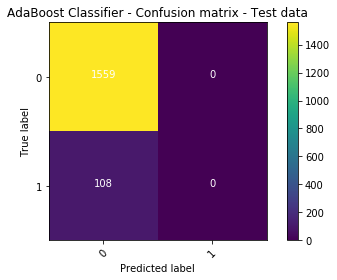

In [40]:
#Confusion matrix 
import itertools
conf_mat_abc = confusion_matrix(y_test, pred_abc)
print(conf_mat_abc)
classes=y_test.unique()
plt.imshow(conf_mat_abc)#, interpolation='nearest')
plt.title('AdaBoost Classifier - Confusion matrix - Test data')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(conf_mat_abc.shape[0]), range(conf_mat_abc.shape[1])):
        #thresh = conf_mat.max() / 2.
        plt.text(j, i, format(conf_mat_abc[i, j]),
                 horizontalalignment="center",
                 color="white")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

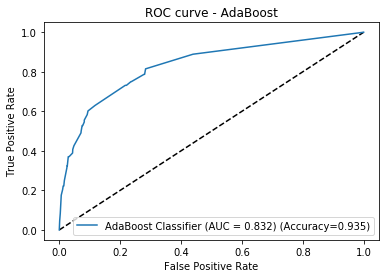

In [41]:
#sklearn.metrics.roc_auc_score(y_test, y_score, average=’macro’, sample_weight=None, max_fpr=None)
from sklearn.metrics import roc_curve,roc_auc_score,auc
y_pred_abc_prob=best_param_abc.predict_proba(X_test)[:, 1]
fpr_abc, tpr_abc, _ = roc_curve(y_test, y_pred_abc_prob)
abc_roc_auc=auc(fpr_abc, tpr_abc)
abc_score=best_param_abc.score(X_test,y_test)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_abc, tpr_abc, label='AdaBoost Classifier (AUC = %0.3f) (Accuracy=%0.3f)' %(abc_roc_auc,abc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'AdaBoost - Variable Importance')

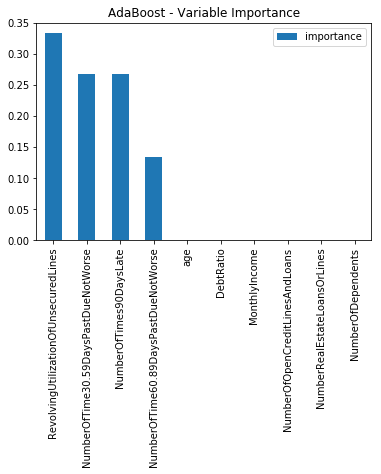

In [42]:
feature_importances = pd.DataFrame(best_param_abc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.title('AdaBoost - Variable Importance')

In [43]:
#Comparing all the models 

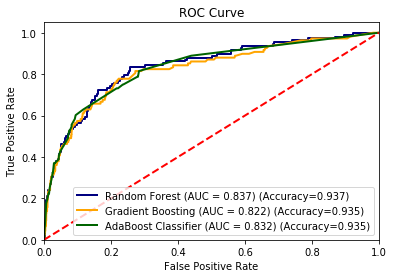

In [44]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='navy',
         lw=2, label='Random Forest (AUC = %0.3f) (Accuracy=%0.3f)' %(rf_roc_auc,rf_score))
plt.plot(fpr_gbc, tpr_gbc, color='orange',
         lw=2,  label='Gradient Boosting (AUC = %0.3f) (Accuracy=%0.3f)' %(gbc_roc_auc,gbc_score))
plt.plot(fpr_abc, tpr_abc, color='darkgreen',
         lw=2, label='AdaBoost Classifier (AUC = %0.3f) (Accuracy=%0.3f)' %(abc_roc_auc,abc_score))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 3.Point out one advantage and one disadvantage of Random Forest compared to GBDT.

Advantage of Random Forest over GBDT

Both Random Forest and Gradient Boosting are ensemble methods, i.e. predict or classify by combining the outputs from 
individual trees.
Advantage of Random Forest over GBDT
Random Forests are easier to tune when compared to GBDT because RF has lesser tuning parameters. Training in RF is faster because RF builds trees parallelly while GBDT builds trees sequentially. 

RF train each tree independently, using a random sample of the data. The trees are made uncorrelated and helps to make the model more robust, reduces the variance
and less likely to overfit on the training data when compared to GBDT. RF is good for parallel and distributed computing too.

Disadvantage of Random Forest over GBDT

For data including categorical variables with different number of levels, random forests are biased in 
favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data.

GBTs build trees one at a time, where each new tree learns from the errors made by previously trained tree.
With each tree added, the model becomes even more expressive. Whereas in RF, the errors built from the parallel trees are averaged out. 
Hence, GBDT performs much better on the unbalanced class data when compared to RF. 